In [102]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from config import api_key

In [119]:
url=f"http://api.eia.gov/series/?api_key={api_key}&series_id=EMISS.CO2-C-CLEIB-CA.A"
response=requests.get(url).json()
json.dumps(response)

'{"request": {"command": "series", "series_id": "EMISS.CO2-C-CLEIB-CA.A"}, "series": [{"series_id": "EMISS.CO2-C-CLEIB-CA.A", "name": "Coefficient for electric power carbon dioxide emissions, coal (electric utility), California", "units": "Kilograms of CO2 per million Btu", "f": "A", "unitsshort": "kgCO2/mmBtu", "description": "See http://www.eia.gov/environment/emissions/state/analysis/ for technical notes and documentation.", "copyright": "None", "source": "EIA, U.S. Energy Information Administration", "iso3166": "USA-CA", "geography": "USA-CA", "start": "1980", "end": "2014", "updated": "2017-01-26T14:27:58-0500", "data": [["2014", 94.438044], ["2013", 94.438044], ["2012", 94.438044], ["2011", 94.438044], ["2010", 94.438044], ["2009", 94.438044], ["2008", 94.438044], ["2007", 94.438044], ["2006", 94.438044], ["2005", 94.438044], ["2004", 94.438044], ["2003", 94.438044], ["2002", 94.438044], ["2001", 94.438044], ["2000", 94.438044], ["1999", 94.438044], ["1998", 94.438044], ["1997", 

In [116]:
res = {'res_data': response['series'][0]['data']}
data_df=pd.DataFrame(res)
data_df[['Year','CO2']] = pd.DataFrame(data_df.res_data.values.tolist(), index= data_df.index)
new_df = pd.DataFrame(data_df['res_data'].values.tolist(), columns=['Year','CO2'])
new_df.head()

,Year,CO2
0,2014,94.438044
1,2013,94.438044
2,2012,94.438044
3,2011,94.438044
4,2010,94.438044


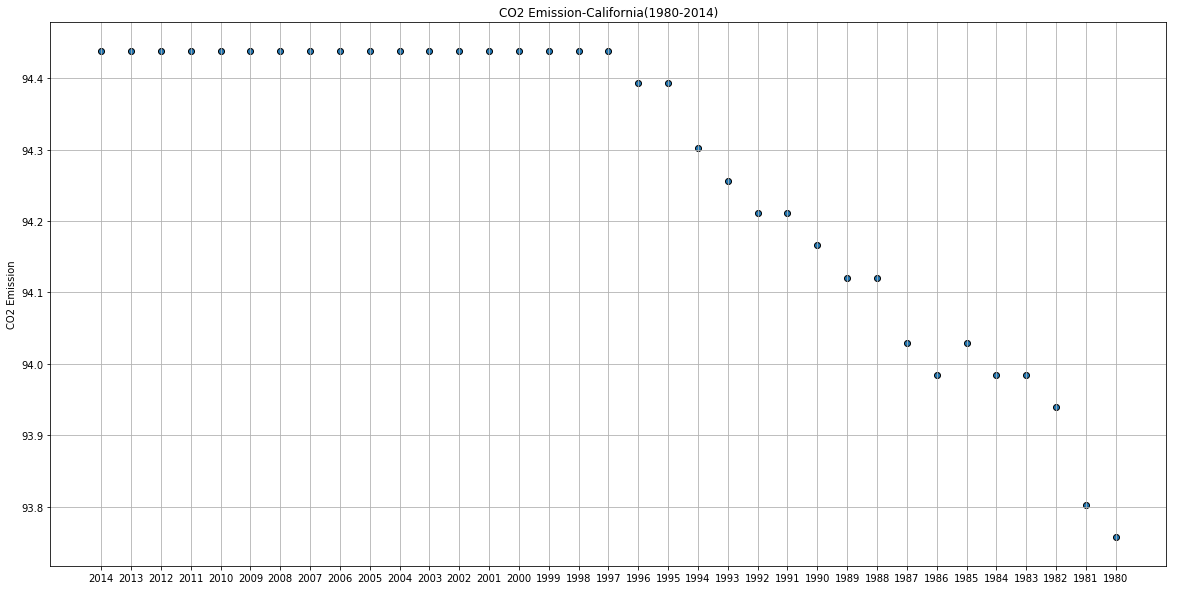

In [118]:
x_vals = new_df["Year"]
y_vals = new_df["CO2"]
plt.subplots(figsize=(20, 10))
plt.scatter(x_vals, y_vals, marker="o",edgecolors="black",alpha=1)
plt.title("CO2 Emission-California(1980-2014)")
plt.ylabel("CO2 Emission")
plt.grid(True)